Results have been exported to exported.csv


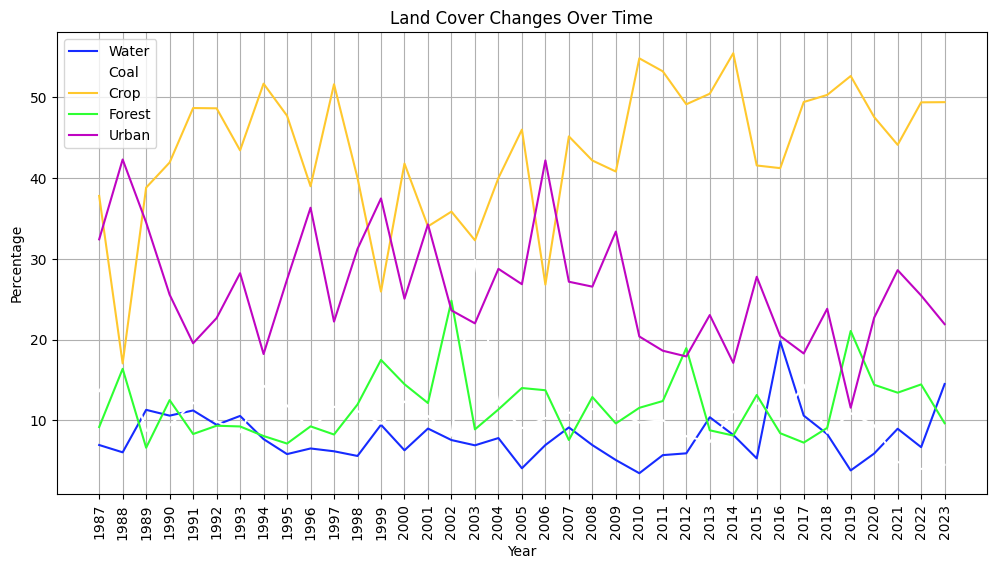

In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the colors we're interested in (as RGB tuples)
colors = {
    '#162bff': (22, 43, 255),   # water (0)
    '#ffffff': (255, 255, 255), # coal (1)
    '#ffc82d': (255, 200, 45),  # crop (2)
    '#2eff32': (46, 255, 50),   # forest (3)
    '#bf04c2': (191, 4, 194)    # urban (4)
}

def analyze_image(image_path):
    # Load and convert the image to RGB format
    image = Image.open(image_path).convert("RGB")
    
    # Convert the image to a numpy array for analysis
    image_np = np.array(image)
    
    # Count pixels for each color
    color_counts = {color: np.all(image_np == rgb, axis=-1).sum() for color, rgb in colors.items()}
    
    # Calculate the total count of the pixels for the specified colors
    total_color_pixels = sum(color_counts.values())
    
    # Calculate the percentages so that the sum is 100
    color_percentages = {color: (count / total_color_pixels) * 100 for color, count in color_counts.items()}
    
    return color_percentages

# Directory containing the images
image_dir = 'C:\\Users\\Nikhil\\Desktop\\Project\\Images'

# Get all PNG files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png') and f.startswith('Landsat_Classified_')]

# Analyze all images and store results
results = []
for image_file in image_files:
    year = image_file.split('_')[-1].split('.')[0]  # Extract year from filename
    image_path = os.path.join(image_dir, image_file)
    percentages = analyze_image(image_path)
    
    # Add year and percentages to results
    result = {'Year': year}
    result.update({f'{label} (%)': percentages[color] for color, label in zip(colors.keys(), ['Water', 'Coal', 'Crop', 'Forest', 'Urban'])})
    results.append(result)

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Sort the DataFrame by year
df = df.sort_values('Year')

# Export to CSV
csv_path = 'exported.csv'
df.to_csv(csv_path, index=False)

print(f"Results have been exported to {csv_path}")

# Plotting
plt.figure(figsize=(12, 6))
for color, label in zip(colors.keys(), ['Water', 'Coal', 'Crop', 'Forest', 'Urban']):
    plt.plot(df['Year'], df[f'{label} (%)'], label=label, color=color)

plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Land Cover Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()